# Exercici 1

#### Crea almenys una visualització per:

#### Una variable categòrica (UniqueCarrier)

#### Importem el fitxer csv i li donc nom a la primera columna, que no en te, i mostro el DataFrame

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
ds=pd.read_csv("DelayedFlights.csv")
ds=ds.rename(columns={ds.columns[0]: 'id'})

In [10]:
#ds.head(100)
ds

,id,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


#### Fem una grafica d'un sol valor, afagem com a clau UniqueCarrier en un eix, i en l'altre contem els valors que tenim per cada UniqueCarrier

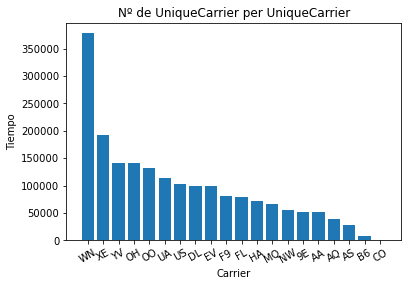

In [94]:
x_values = ds['UniqueCarrier'].unique()
y_values = ds['UniqueCarrier'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Nº de UniqueCarrier per UniqueCarrier")
plt.xlabel("Carrier")
plt.ylabel("Nº")
plt.show()


#### Una variable numèrica (ArrDelay)

#### Representarem un histograma del camp ArrDelay. Un histograma es una representació gràfica que ens permet veure la distribució de la freqüencia de les mostres. En aquest exemple he fet servir la funcion skew que ens calcula la asimetría de les dades, per posar un valor mes correcta al camps bins. El camp bins es el número de blocs en els que volem dividir la informació

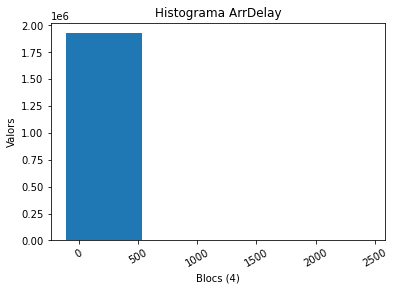

In [111]:
from scipy.stats import skew
bns = round((ds['ArrDelay'].skew(axis=0))+0.5)
plt.hist(ds['ArrDelay'], bins = bns)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Histograma ArrDelay")
plt.xlabel("Blocs (" + str(bns) + ")")
plt.ylabel("Valors")
plt.show()


#### Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

#### En aquesta grafica agrupem per UniqueCarrier i sumem tots els valors ArrDelay de cada UniqueCarrier

Text(0, 0.5, 'Temps')

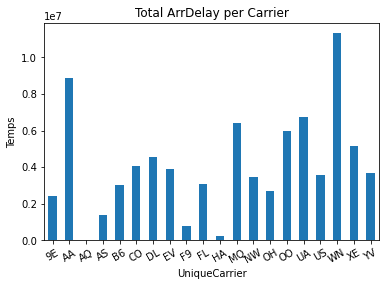

In [114]:
groups=ds.groupby(['UniqueCarrier'])['ArrDelay'].sum()
groups.plot.bar()
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Total ArrDelay per Carrier")
plt.xlabel("UniqueCarrier")
plt.ylabel("Temps")


#### Dues variables numèriques (ArrDelay i DepDelay)

#### Amb dos variables numèriques, representarem una grafica de disperció. Serveix per observar la relació entre les variables i s'utilitza per representar la relació entre elles, com un canvi en una afecta a l'altre

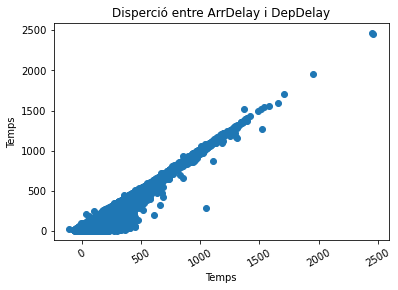

In [117]:
plt.plot( 'ArrDelay','DepDelay', data=ds, linestyle='none', marker='o')
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Disperció entre ArrDelay i DepDelay")
plt.xlabel("Temps")
plt.ylabel("Temps")
plt.show()


#### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

#### En aquesta gràfica estem representan dos valos referenciats per UniqueCarrier, en aquesta cas ArrDelay i DepDelay. Un cop representat veig que la gràfica no es la millor per representar aquests valors

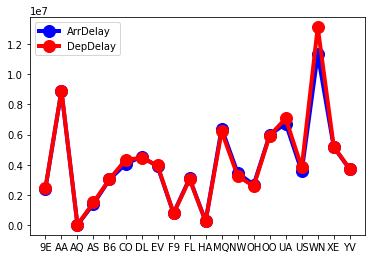

In [64]:
groups=ds[['UniqueCarrier','ArrDelay','DepDelay']].groupby(['UniqueCarrier']).sum().reset_index()
plt.plot( 'UniqueCarrier', 'ArrDelay', data=groups, marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=4)
plt.plot( 'UniqueCarrier', 'DepDelay', data=groups, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.legend()
plt.show()

#### Son les mateixes dades que l'anterior, però en aquest cas fem servir una gràfica de barres on es pot comparar millor la diferencia entre els dos valors. La he posat en horitzontal perque crec que es veu millor, hi he ordenat el valors de mes gran a mes petit

Text(0, 0.5, 'Tiempo')

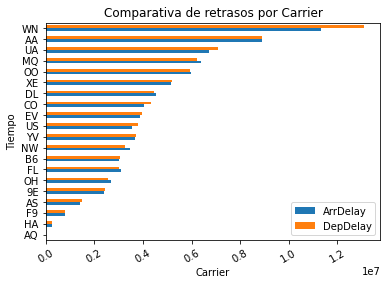

In [82]:
df=ds[['UniqueCarrier','ArrDelay','DepDelay']].groupby(['UniqueCarrier']).sum().sort_values(by=['DepDelay'], ascending=True)
#df.plot(kind="bar") #vertical
df.plot(kind="barh") #horizontal
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Comparativa de retrasos por Carrier")
plt.xlabel("Carrier")
plt.ylabel("Tiempo")

#### Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)

#### En aquesta gràfica estem representan tres valos referenciats per UniqueCarrier, en aquesta cas ArrDelay, DepDelay i AirTime. Un cop representat veig que la gràfica no es la millor per representar aquests valors

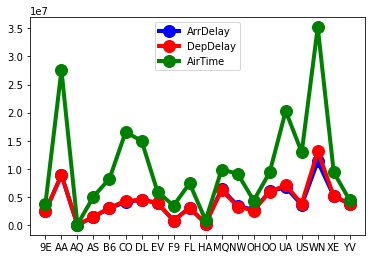

In [67]:
groups=ds[['UniqueCarrier','ArrDelay','DepDelay','AirTime']].groupby(['UniqueCarrier']).sum().reset_index()
plt.plot( 'UniqueCarrier', 'ArrDelay', data=groups, marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=4)
plt.plot( 'UniqueCarrier', 'DepDelay', data=groups, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.plot( 'UniqueCarrier', 'AirTime', data=groups, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.legend()
plt.show()

#### Son les mateixes dades que l'anterior, però en aquest cas fem servir una gràfica de barres on es pot comparar millor la diferencia entre els dos valors ArrDelay i DepDelay. He afegit la tercer columna de AirTime. Ho he posat en vertical perque crec que es veu millor, hi he ordenat el valors de mes petit a mes gran.

Text(0, 0.5, 'Tiempo')

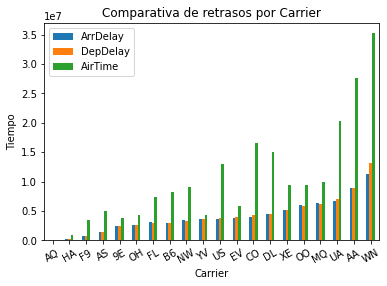

In [83]:
df=ds[['UniqueCarrier','ArrDelay','DepDelay','AirTime']].groupby(['UniqueCarrier']).sum().sort_values(by=['DepDelay'], ascending=True)
df.plot(kind="bar") #vertical
#df.plot(kind="barh") #horizontal
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Comparativa de retrasos por Carrier")
plt.xlabel("Carrier")
plt.ylabel("Tiempo")

# Exercici 2

#### Exporta els gràfics com imatges o com html

#### Representem el grafic anterior, però enlloc de visualitzar-lo, l'exportem a jpg.

In [66]:
groups=ds[['UniqueCarrier','ArrDelay','DepDelay','AirTime']].groupby(['UniqueCarrier']).sum().reset_index()
plt.plot( 'UniqueCarrier', 'ArrDelay', data=groups, marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=4)
plt.plot( 'UniqueCarrier', 'DepDelay', data=groups, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.plot( 'UniqueCarrier', 'AirTime', data=groups, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.legend()
plt.savefig('4graph.jpg')

<Figure size 432x288 with 0 Axes>

# Exercici 3

#### Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2

#### Fet i vinculat